In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid') 
sns.set_context('talk')
NEUTRAL = '#3c8da0ff' 
LIGHT_BLUE = '#9fc5e8ff' 
HIGHLIGHT='#b6d7a8ff' 
AQUA = '#9edcd9ff' 
LIGHT_GRAY = '#7994a9a5' 
DARK_GRAY = '#40566dff' 
WHITE = '#f2f2f2ff'
COLORS = [DARK_GRAY, LIGHT_BLUE, NEUTRAL] 
sns.set_palette(sns.color_palette(COLORS,3))

# Import and Examine the Data

In [2]:
xls = pd.ExcelFile('Programming Project Data.xlsx')
state = pd.read_excel(xls, 'State Test Scores')
iready = pd.read_excel(xls, 'i-Ready Scores')

In [3]:
# Examine the state data
state.head()

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
0,100416,Gr 3 Reading,439,Proficient,School10,3.0,Reading,563,Late 3
1,100426,Gr 3 Reading,561,Proficient,School1,3.0,Reading,575,Late 3
2,100775,Gr 3 Reading,414,Proficient,School1,3.0,Reading,537,Early 3
3,101873,Gr 3 Reading,398,Not Proficient,School6,3.0,Reading,558,Mid 3
4,104224,Gr 3 Reading,391,Not Proficient,School10,3.0,Reading,544,Early 3


In [4]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           2793 non-null   int64  
 1   Test_Name         2793 non-null   object 
 2   Score             2793 non-null   object 
 3   Proficiency       2780 non-null   object 
 4   School            2790 non-null   object 
 5   Student_Grade     2790 non-null   float64
 6   iReady_Subject    2790 non-null   object 
 7   iReady_Score      2790 non-null   object 
 8   iReady_Placement  2790 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 196.5+ KB


The state data already appears to have been combined with the i-Ready data. Based upon the number of non-null values in each column, there are 3 students that do not have i-Ready scores and 13 that do not have proficiency ratings. Both score and i-Ready score are currently stored as strings, so these will need to be converted to a numerical data type for analysis. This may indicate that there is some non-numeric data stored in these columns.

In [5]:
#Examine the i-Ready data
iready.head()

,User_ID,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
0,100426,School1,3,Reading,575,Late 3
1,100775,School1,3,Reading,537,Early 3
2,104714,School1,3,Reading,578,Late 3
3,113566,School1,3,Reading,538,Early 3
4,120613,School1,3,Reading,555,Mid 3


In [6]:
iready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           2790 non-null   int64 
 1   School            2790 non-null   object
 2   Student_Grade     2790 non-null   int64 
 3   iReady_Subject    2790 non-null   object
 4   iReady_Score      2790 non-null   object
 5   iReady_Placement  2790 non-null   object
dtypes: int64(2), object(4)
memory usage: 130.9+ KB


# Clean the Data

The data appear to have already been combined; however, I will need to validate that the user ids match to ensure that they datasets were indeed combined.

If the data had not been combined, I could have used an inner join on user id to keep the rows with records in both tables. 

First, I will examine the observations with missing i-Ready data.

In [7]:
#Records without i-Ready data
state[state['School'].isna()]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
1503,271370,Gr 6 Reading,485,Proficient,NaN,NaN,NaN,NaN,NaN
1504,273016,Gr 6 Reading,415,Not Proficient,NaN,NaN,NaN,NaN,NaN
1661,568363,Gr 6 Reading,499,Proficient,NaN,NaN,NaN,NaN,NaN


Because the purpose of the analysis is to to correlate i-Ready score with state scores, these 3 records will be removed.

In [8]:
state = state[state['School'].notna()]

I will now verify that the user ids match between the i_Ready data and the state data.

In [9]:
sorted(iready['User_ID']) == sorted(state['User_ID'].values)

True

It appears that the i-Ready data has indeed been joined with the state data.

Next, I will examine the records that are missing proficiency scores.

In [10]:
state[state['Proficiency'].isna()]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
725,658895,Gr 4 Reading,494,NaN,School5,4.0,Reading,567,Early 4
916,131930,Gr 5 Reading,436,NaN,School12,5.0,Reading,596,Early 5
945,188143,Gr 5 Reading,M,NaN,School15,5.0,Reading,600,Early 5
992,265375,Gr 5 Reading,M,NaN,School14,5.0,Reading,599,Early 5
999,281498,Gr 5 Reading,M,NaN,School3,5.0,Reading,569,Grade 4
1022,327409,Gr 5 Reading,M,NaN,School12,5.0,Reading,649,Grade 6
1053,377907,Gr 5 Reading,E,NaN,School11,5.0,Reading,448,Grade 1
1201,649934,Gr 5 Reading,E,NaN,School1,5.0,Reading,642,Grade 6
1210,675017,Gr 5 Reading,E,NaN,School10,5.0,Reading,583,Early 5
1263,773727,Gr 5 Reading,E,NaN,School11,5.0,Reading,614,Mid 5


There are two different situations here. For 5 records, scores are provided and so the missing proficiency scores can be imputed using the complete records.

For the other 8 records, the state score is recorded as either 'E' or 'M'. Without the metadata, it is unclear what these indicate, although they may show some form of "present, did not test." These records will need to be removed, as we do not have the state scores.

In [11]:
#remove the non-score records
state = state[(state['Score'] != 'E') & (state['Score'] != 'M')]

#convert the scores to integers
state['Score'] = state['Score'].astype(int)

In [12]:
#Find the minimum score needed to earn Proficient
state[state['Proficiency'] == 'Proficient'].sort_values('Score')[:10]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
415,916436,Gr 3 Reading,414,Proficient,School12,3.0,Reading,544,Early 3
387,863586,Gr 3 Reading,414,Proficient,School3,3.0,Reading,574,Late 3
55,194957,Gr 3 Reading,414,Proficient,School12,3.0,Reading,534,Early 3
90,273001,Gr 3 Reading,414,Proficient,School1,3.0,Reading,543,Early 3
104,316892,Gr 3 Reading,414,Proficient,School5,3.0,Reading,565,Late 3
310,728825,Gr 3 Reading,414,Proficient,School10,3.0,Reading,510,Grade 2
301,712454,Gr 3 Reading,414,Proficient,School6,3.0,Reading,556,Mid 3
151,418369,Gr 3 Reading,414,Proficient,School10,3.0,Reading,515,Early 3
419,922399,Gr 3 Reading,414,Proficient,School15,3.0,Reading,528,Early 3
435,948524,Gr 3 Reading,414,Proficient,School6,3.0,Reading,539,Early 3


In [13]:
#It looks like 414 is the minimum. I will verify that.

state[state['Proficiency'] == 'Not Proficient'].sort_values(
    'Score', 
    ascending=False
)[:10]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
2241,854641,Gr 7 Reading,461,Not Proficient,School13,7.0,Reading,347,Grade K
2257,915669,Gr 7 Reading,461,Not Proficient,School8,7.0,Reading,636,Mid 7
2382,248304,Gr 8 Reading,461,Not Proficient,School8,8.0,Reading,630,Early 8
2035,391085,Gr 7 Reading,461,Not Proficient,School7,7.0,Reading,625,Early 7
2217,789293,Gr 7 Reading,461,Not Proficient,School7,7.0,Reading,698,Grade 9
2593,640186,Gr 8 Reading,461,Not Proficient,School8,8.0,Reading,682,Late 8
2317,138583,Gr 8 Reading,461,Not Proficient,School7,8.0,Reading,630,Early 8
2428,323079,Gr 8 Reading,461,Not Proficient,School8,8.0,Reading,638,Early 8
2114,558218,Gr 7 Reading,461,Not Proficient,School7,7.0,Reading,709,Grade 10
1967,222090,Gr 7 Reading,461,Not Proficient,School8,7.0,Reading,614,Early 7


This shows that the cutoff score is different for different grade levels. The missing data that need to be imputed are for grades 4,5,6 and 7. 

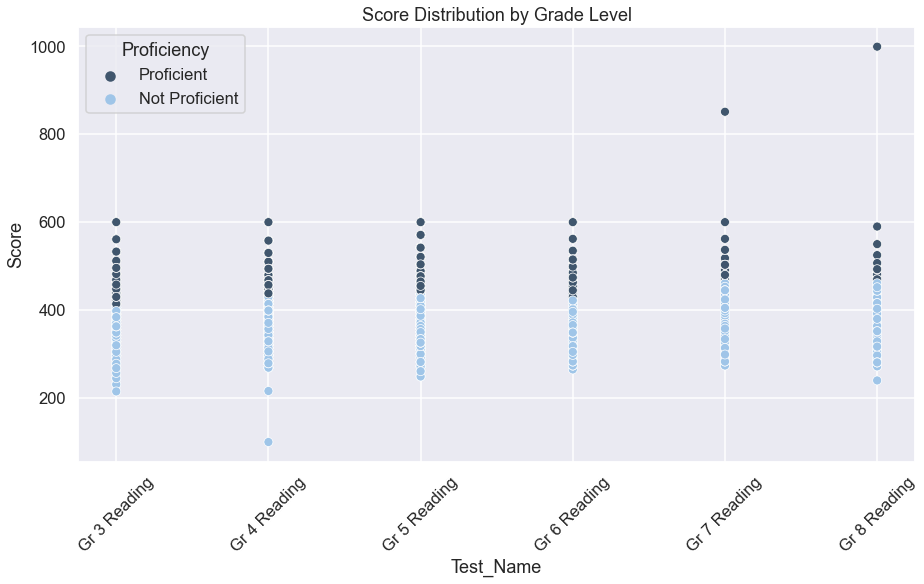

In [14]:
#examine the distribution of scores by grade level 
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data=state, x='Test_Name', y='Score', hue='Proficiency')
plt.title('Score Distribution by Grade Level')
plt.xticks(rotation=45);

The labels appear consistent overall. I will find the cutoff values for the labels, impute the missing labels and then fix the mislabeled columns. There are also score values outside of the specified range that will need to be handled.

In [15]:
#Create a dictionary with the grade as a key and the proficiency cut-off
#scores as a tuple

grade_dict = {}

#iterate through the grades with missing values
for grade in range(4,8):
    
    #find the min score needed for proficiency
    min_prof = (
        state[
            (state['Student_Grade'] == grade) & 
            (state['Proficiency'] == 'Proficient')]
        .sort_values('Score')[:1]['Score'].values[0]
    )
    
    #find the max score 
    max_not_prof = (
        state[
            (state['Student_Grade'] == grade) & 
            (state['Proficiency'] == 'Not Proficient')]
        .sort_values('Score', ascending=False)[:1]['Score'].values[0]
    )
    
    grade_dict[grade] = (min_prof, max_not_prof)
    
grade_dict

{4: (438, 430), 5: (445, 436), 6: (430, 422), 7: (470, 461)}

In [16]:
def impute_prof(score, grade, prof, grade_dict=grade_dict):
    """Takes in the score, grade, proficiency columns and a default grade
    dictionary. Check to see if the grade level has any missing proficiency
    values and, if so, uses the dictionary to impute the missing value."""
    
    if grade not in range(4,8):
        return prof
    else:
        cutoff = grade_dict[int(grade)]
    if score >= cutoff[0]:
        return 'Proficient'
    elif score <= cutoff[1]:
        return 'Not Proficient'
    else:
        return 'Error'

In [17]:
#Apply the function
state['Proficiency'] = state.apply(
    lambda x: impute_prof(
        x['Score'],
        x['Student_Grade'], 
        x['Proficiency']
    ), axis=1
)

In [19]:
#Check the results
state['Proficiency'].value_counts()

Not Proficient    1748
Proficient        1034
Name: Proficiency, dtype: int64

In [20]:
state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 2792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           2782 non-null   int64  
 1   Test_Name         2782 non-null   object 
 2   Score             2782 non-null   int64  
 3   Proficiency       2782 non-null   object 
 4   School            2782 non-null   object 
 5   Student_Grade     2782 non-null   float64
 6   iReady_Subject    2782 non-null   object 
 7   iReady_Score      2782 non-null   object 
 8   iReady_Placement  2782 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 217.3+ KB


In [21]:
state['Test_Name'].value_counts()

Gr 6 Reading    511
Gr 8 Reading    499
Gr 5 Reading    481
Gr 3 Reading    459
Gr 4 Reading    445
Gr 7 Reading    387
Name: Test_Name, dtype: int64

Everything looks fine here.

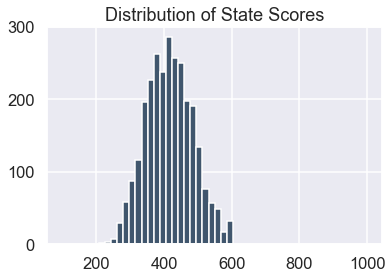

In [22]:
state['Score'].hist(bins=50)
plt.title('Distribution of State Scores');

In [23]:
state['Score'].describe()

count    2782.000000
mean      417.677570
std        70.908842
min       100.000000
25%       366.000000
50%       417.000000
75%       465.000000
max       999.000000
Name: Score, dtype: float64

The scores appear to be fairly normally distributed, which is to be expected. However, the scores should range from 200 to 600 and there are values outside of that range.

In [24]:
state[(state['Score'] < 200) | (state['Score'] > 600)]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
565,307607,Gr 4 Reading,100,Not Proficient,School6,4.0,Reading,488,Grade 2
1972,233780,Gr 7 Reading,851,Proficient,School13,7.0,Reading,666,Late 7
2343,188497,Gr 8 Reading,999,Proficient,School7,8.0,Reading,679,Late 8


These are not valid scores and so these records will need to be removed.

In [25]:
state = state[(state['Score'] >= 200) & (state['Score'] <= 600)]

In [26]:
state['School'].value_counts()

School7     573
School8     489
School13    306
School11    279
School6     190
School1     178
School5     154
School14    150
School10    138
School12    124
School15    108
School3      49
School4      27
School16      6
School9       5
School2       3
Name: School, dtype: int64

Everything looks fine here, although the low student counts at schools 2, 9 and 16 may be important.

In [27]:
state['Student_Grade'].value_counts()

6.0    516
8.0    499
5.0    476
3.0    459
4.0    443
7.0    383
2.0      2
9.0      1
Name: Student_Grade, dtype: int64

In [28]:
state[(state['Student_Grade'] == 9) | (state['Student_Grade'] == 2)]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement
194,515628,Gr 3 Reading,458,Proficient,School12,2.0,Reading,619,Grade 4
398,881624,Gr 3 Reading,305,Not Proficient,School15,2.0,Reading,465,Grade 1
2639,721853,Gr 8 Reading,493,Proficient,School8,9.0,Reading,616,Grade 7


Grades 2 and 9 stand out with very few records. 

There is a mismatch between the student grade and the recorded test. Before deciding how to proceed, I will check the rest of the dataset for this issue.

In [29]:
#Create a new column with the grade level of the state test
state['test_grade_level'] = state['Test_Name'].apply(
    lambda x: int(x.split()[1])
)

#find the number of records where where the state test level does not match 
#the grade level
state[state['test_grade_level'] != state['Student_Grade']].shape[0]

29

Handling these records requires a judgment call. With only 29 entries (1% of the data) with mismatched test and grade levels and with 3 of these resulting in grade levels that are not accounted for otherwise, I am going to reach the conclusion that there is an error in these entries.

In [30]:
state[state['test_grade_level'] != state['Student_Grade']]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement,test_grade_level
194,515628,Gr 3 Reading,458,Proficient,School12,2.0,Reading,619,Grade 4,3
398,881624,Gr 3 Reading,305,Not Proficient,School15,2.0,Reading,465,Grade 1,3
605,388927,Gr 4 Reading,494,Proficient,School15,5.0,Reading,675,Grade 7,4
739,690777,Gr 4 Reading,392,Not Proficient,School11,5.0,Reading,524,Grade 3,4
749,707620,Gr 4 Reading,530,Proficient,School11,3.0,Reading,675,Grade 7,4
888,958463,Gr 4 Reading,399,Not Proficient,School6,5.0,Reading,546,Grade 3,4
995,276199,Gr 5 Reading,318,Not Proficient,School6,6.0,Reading,517,Grade 3,5
997,277663,Gr 5 Reading,387,Not Proficient,School6,6.0,Reading,533,Grade 3,5
1143,543412,Gr 5 Reading,326,Not Proficient,School5,6.0,Reading,558,Grade 4,5
1147,553645,Gr 5 Reading,402,Not Proficient,School5,6.0,Reading,563,Grade 4,5


None of the scores are on one of the cutoff boundaries, which would offer a clue as to which label is incorrect. Because of that, I will remove these records.

In [31]:
state = state[state['test_grade_level'] == state['Student_Grade']]

In [32]:
state['iReady_Subject'].value_counts()

Reading    2750
Name: iReady_Subject, dtype: int64

Everything looks fine here.

In [33]:
state['iReady_Score'].value_counts()

549    27
608    25
596    25
574    24
594    23
       ..
401     1
399     1
903     1
387     1
422     1
Name: iReady_Score, Length: 307, dtype: int64

In [34]:
(
    state[(state['iReady_Score'] == 0) | 
          (state['iReady_Score'] == 'P') | 
          (state['iReady_Score'] == 'X')]
)

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement,test_grade_level
1018,320973,Gr 5 Reading,427,Not Proficient,School12,5.0,Reading,P,Grade 2,5
1825,860302,Gr 6 Reading,499,Proficient,School8,6.0,Reading,0,Early 6,6
2686,826963,Gr 8 Reading,375,Not Proficient,School8,8.0,Reading,X,Early 8,8


There are three i-Ready scores that immediately stand out. Before removing these, I will check to see if there are other records with students in the same grade and same placement to see if I can use that to fill in the missing values.

In [35]:
(
    state[(state['Student_Grade'] == 5) 
          & (state['iReady_Placement'] == 'Grade 2')]
    .shape[0])

13

In [36]:
(
    state[(state['Student_Grade'] == 6)
          & (state['iReady_Placement'] == 'Early 6')]
    .shape[0])

60

In [37]:
(
    state[(state['Student_Grade'] == 8)
          & (state['iReady_Placement'] == 'Early 8')]
    .shape[0])

86

There are records that match these parameters. I am going to temporarily replace the P and X with a 0, convert the column to type integer and then replace the three 0 entries with the means of the respective matching columns.

In [38]:
state['iReady_Score'].replace('P', 0, inplace=True)
state['iReady_Score'].replace('X', 0, inplace=True)
state['iReady_Score'] = state['iReady_Score'].astype(int)

state['iReady_Score'].describe()

count    2750.000000
mean      580.355273
std        65.800192
min         0.000000
25%       541.250000
50%       583.000000
75%       624.000000
max       903.000000
Name: iReady_Score, dtype: float64

In [39]:
state[(state['iReady_Score'] >800) | (state['iReady_Score'] <100)]

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement,test_grade_level
429,936066,Gr 3 Reading,257,Not Proficient,School10,3.0,Reading,92,Grade 1,3
1018,320973,Gr 5 Reading,427,Not Proficient,School12,5.0,Reading,0,Grade 2,5
1745,715416,Gr 6 Reading,437,Proficient,School13,6.0,Reading,903,Grade 5,6
1825,860302,Gr 6 Reading,499,Proficient,School8,6.0,Reading,0,Early 6,6
2686,826963,Gr 8 Reading,375,Not Proficient,School8,8.0,Reading,0,Early 8,8


Again, there are scores outside of the stated range of 100 to 800. I will fix those in the same manner

In [40]:
def fix_score(df):
    """Takes in the dataframe and replaces the iReady scores of 0 with
    the mean of the scores of the students with the same grade level and 
    placement combination."""
    
    #get indices of problem entires
    zero = list(state[state['iReady_Score'] == 0].index.values)
    extremes = list(
        state[(state['iReady_Score'] >800) | 
              (state['iReady_Score'] <100)].index.values
    )
    indices = zero + extremes
    
    #iterate through the indices of the 0 scored
    for i in indices:
        
        #assign the grade and placement levels
        grade = df.loc[i, 'Student_Grade']
        place = df.loc[i, 'iReady_Placement']
        
        #find the mean of the corresponding records
        comp_score = (
            df[
                (df['Student_Grade'] == grade) & 
                (df['iReady_Placement'] == place) &
                (df['iReady_Score'] != 0)]
        )['iReady_Score'].mean()
        
        #assign the mean value in place of 0
        df.loc[i, 'iReady_Score'] = comp_score
        
    return df

In [41]:
fix_score(state)

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement,test_grade_level
0,100416,Gr 3 Reading,439,Proficient,School10,3.0,Reading,563.0,Late 3,3
1,100426,Gr 3 Reading,561,Proficient,School1,3.0,Reading,575.0,Late 3,3
2,100775,Gr 3 Reading,414,Proficient,School1,3.0,Reading,537.0,Early 3,3
3,101873,Gr 3 Reading,398,Not Proficient,School6,3.0,Reading,558.0,Mid 3,3
4,104224,Gr 3 Reading,391,Not Proficient,School10,3.0,Reading,544.0,Early 3,3
...,...,...,...,...,...,...,...,...,...,...
2788,998753,Gr 8 Reading,317,Not Proficient,School13,8.0,Reading,534.0,Grade 3,8
2789,998817,Gr 8 Reading,444,Not Proficient,School8,8.0,Reading,632.0,Early 8,8
2790,998970,Gr 8 Reading,403,Not Proficient,School8,8.0,Reading,651.0,Mid 8,8
2791,999511,Gr 8 Reading,452,Not Proficient,School7,8.0,Reading,679.0,Late 8,8


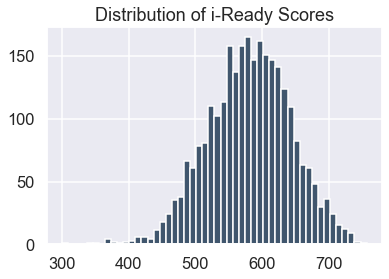

In [42]:
state['iReady_Score'].hist(bins=50)
plt.title('Distribution of i-Ready Scores');

In [43]:
state['iReady_Score'].describe()

count    2750.000000
mean      580.994661
std        62.033345
min       301.000000
25%       542.000000
50%       583.000000
75%       624.000000
max       756.000000
Name: iReady_Score, dtype: float64

In [44]:
state['iReady_Placement'].value_counts()

Grade 3     353
Grade 4     302
Grade 5     194
Grade 7     169
Grade 2     169
Grade 6     169
Late 3      113
Early 3     107
Early 5     103
Grade 1      98
Early 8      86
Early 4      83
Mid 6        77
Grade 9      72
Mid 8        66
Mid 5        66
Mid 4        61
Early 6      60
Late 4       59
Early 7      58
Grade 8      53
Mid 3        47
Late 6       32
Mid 7        32
Late 8       30
Grade 10     28
Late 5       22
Grade K      21
Late 7       15
Grade 11      5
Name: iReady_Placement, dtype: int64

Everything looks fine here.

# Summary Statistics and Visualizations

## Number of Students per Grade Level

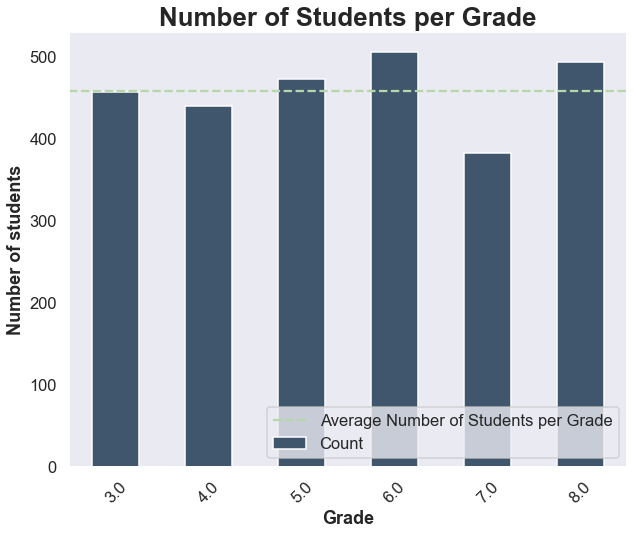

In [68]:
state.groupby('Student_Grade')['User_ID'].count().plot(
    kind='bar', 
    figsize=(10,8), 
    label = 'Count'
)
plt.xticks(rotation=45)
plt.title(
    'Number of Students per Grade', 
    fontweight='bold', 
    fontsize='x-large'
)
plt.xlabel(
    'Grade', 
    fontweight='bold'
)
plt.ylabel(
    'Number of students', 
    fontweight='bold'
)
plt.grid(False)
plt.axhline(
    state.groupby('Student_Grade')['User_ID'].count().mean(), 
    color=HIGHLIGHT, 
    linestyle = '--', 
    label = 'Average Number of Students per Grade')
plt.legend(loc = 'lower right');

In [63]:
state.groupby('Student_Grade')['User_ID'].count().mean()

458.3333333333333

## Percent Proficient on State Test per Grade Level

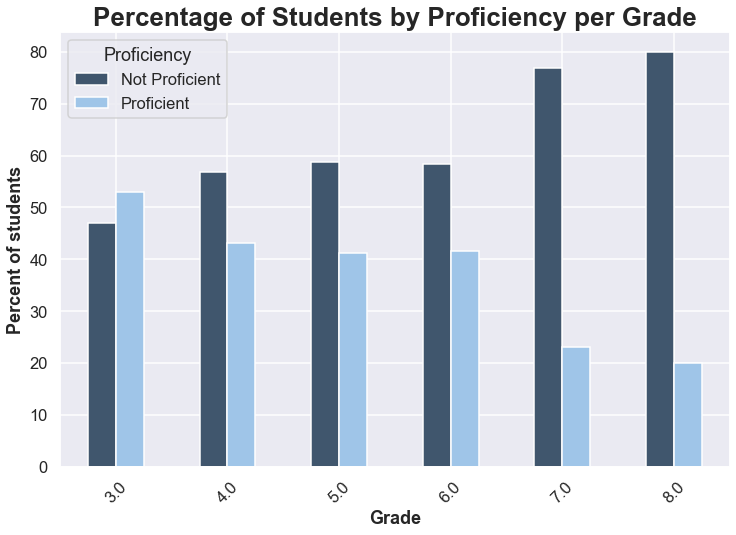

In [46]:
per_grade = pd.crosstab(
    state['Student_Grade'], 
    state['Proficiency'], 
    normalize='index'
)

per_grade['Proficient'] = round(per_grade['Proficient']*100,2)
per_grade['Not Proficient'] = round(per_grade['Not Proficient']*100,2)

per_grade.plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.title(
    'Percentage of Students by Proficiency per Grade', 
    fontweight='bold', 
    fontsize='x-large'
)
plt.xlabel(
    'Grade', 
    fontweight='bold'
)
plt.ylabel(
    'Percent of students', 
    fontweight='bold'
);

## Distribution of Scores by Grade

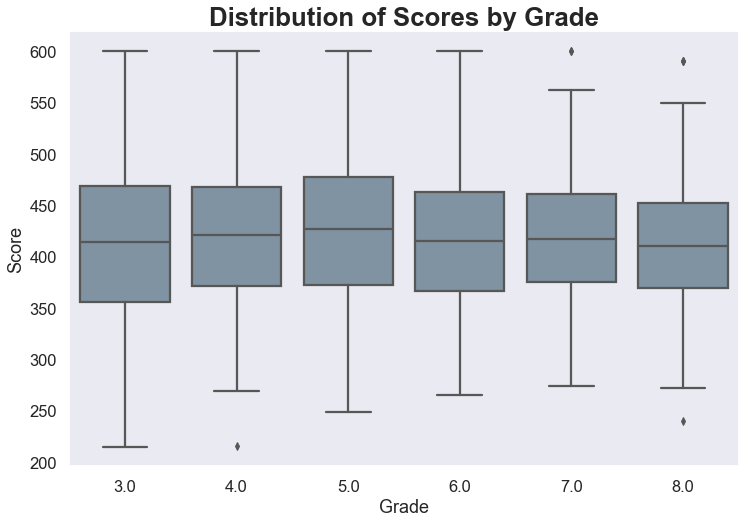

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=state, x='Student_Grade', y='Score', color=LIGHT_GRAY)
plt.title(
    'Distribution of Scores by Grade', 
    fontweight='bold', 
    fontsize='x-large'
)
plt.xlabel('Grade')
plt.grid(False);

## Percent Proficient per School

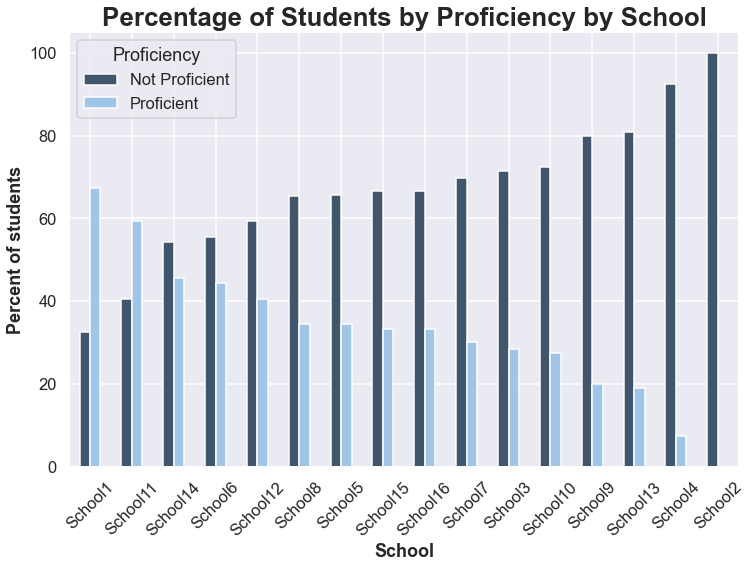

In [48]:
per_sch = pd.crosstab(
    state['School'], 
    state['Proficiency'], 
    normalize='index'
)

per_sch['Proficient'] = round(per_sch['Proficient']*100,2)
per_sch['Not Proficient'] = round(per_sch['Not Proficient']*100,2)

per_sch.sort_values('Proficient', inplace=True, ascending=False)

per_sch.plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.title(
    'Percentage of Students by Proficiency by School', 
    fontweight='bold', 
    fontsize='x-large'
)
plt.xlabel(
    'School', 
    fontweight='bold'
)
plt.ylabel(
    'Percent of students', 
    fontweight='bold'
);

## Distribution of Scores by School

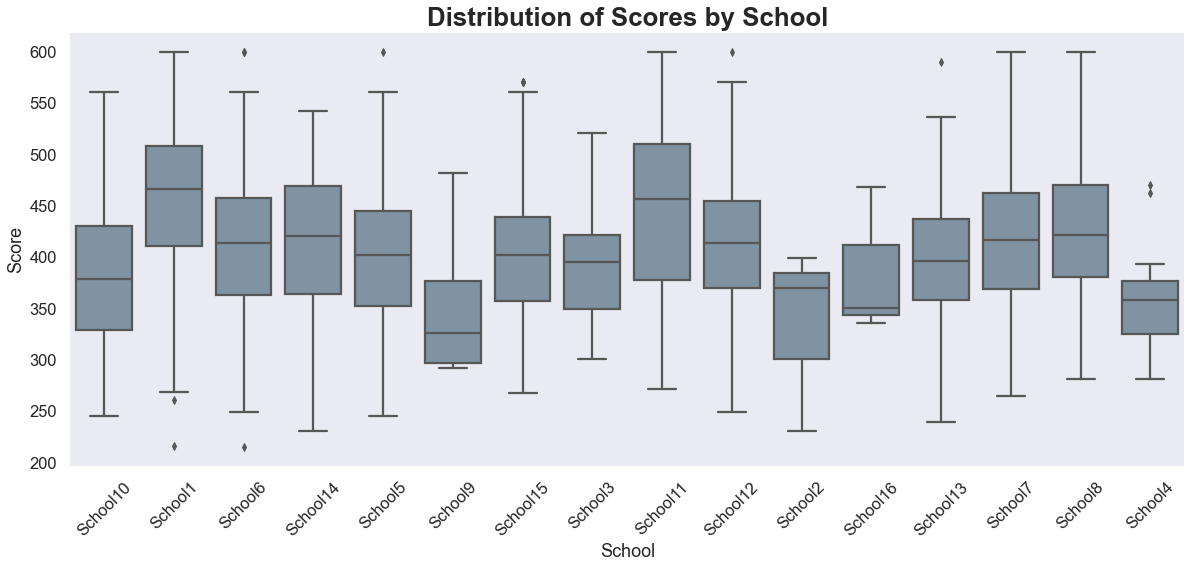

In [49]:
fig, ax = plt.subplots(figsize = (20,8))
sns.boxplot(data=state, x='School', y='Score', color=LIGHT_GRAY)
plt.title(
    'Distribution of Scores by School', 
    fontweight='bold', 
    fontsize='x-large'
)
plt.xlabel('School')
plt.grid(False)
plt.xticks(rotation=45);

## Proficiency Prediction

In [50]:
#Split the placement into grade and level
state['placement_grade'] = state['iReady_Placement'].apply(lambda x: x.split()[-1])
state['placement_level'] = state['iReady_Placement'].apply(lambda x: x.split()[0])

#replace K with 0 and convert grade to integer for comparisons
state['placement_grade'].replace('K',0, inplace=True)
state['placement_grade'] = state['placement_grade'].astype(int)

In [51]:
def get_pred_prof(student_grade, placement_grade, placement_level):
    """Takes in a student's grade level, placement grade and placement level
    and returns a proficieny prediciton."""
    
    if student_grade <= placement_grade and placement_level in (
        ['Mid', 'Late', "Grade"]
    ):
        return 'Proficient'
    else:
        return 'Not Proficient'
    
state['predicted_proficiency'] = state.apply(
    lambda x: get_pred_prof(
        x['Student_Grade'],
        x['placement_grade'], 
        x['placement_level']
    ), axis=1
)

state.head()

,User_ID,Test_Name,Score,Proficiency,School,Student_Grade,iReady_Subject,iReady_Score,iReady_Placement,test_grade_level,placement_grade,placement_level,predicted_proficiency
0,100416,Gr 3 Reading,439,Proficient,School10,3.0,Reading,563.0,Late 3,3,3,Late,Proficient
1,100426,Gr 3 Reading,561,Proficient,School1,3.0,Reading,575.0,Late 3,3,3,Late,Proficient
2,100775,Gr 3 Reading,414,Proficient,School1,3.0,Reading,537.0,Early 3,3,3,Early,Not Proficient
3,101873,Gr 3 Reading,398,Not Proficient,School6,3.0,Reading,558.0,Mid 3,3,3,Mid,Proficient
4,104224,Gr 3 Reading,391,Not Proficient,School10,3.0,Reading,544.0,Early 3,3,3,Early,Not Proficient


## Percent per Grade Predicted Proficient

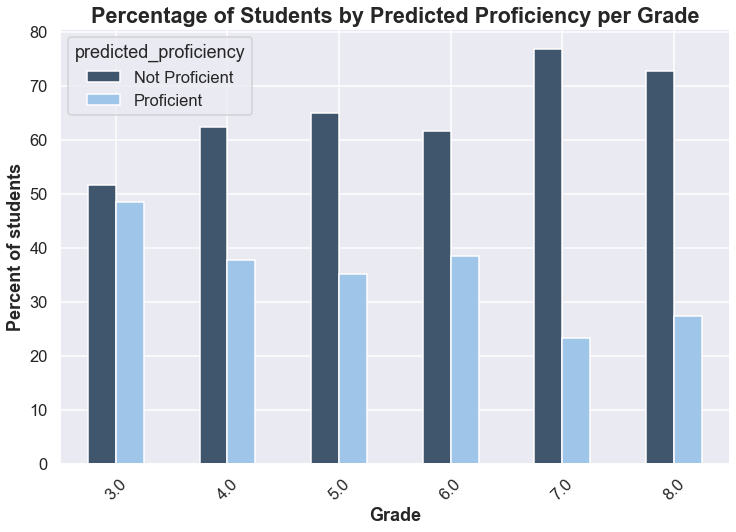

In [52]:
per_grade_pred = pd.crosstab(
    state['Student_Grade'], 
    state['predicted_proficiency'], 
    normalize='index'
)

per_grade_pred['Proficient'] = round(per_grade_pred['Proficient']*100,2)
per_grade_pred['Not Proficient'] = round(per_grade_pred['Not Proficient']*100,2)

per_grade_pred.plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.title(
    'Percentage of Students by Predicted Proficiency per Grade', 
    fontweight='bold', 
    fontsize='large'
)
plt.xlabel(
    'Grade', 
    fontweight='bold'
)
plt.ylabel(
    'Percent of students', 
    fontweight='bold'
);

## Percent Predicted Proficient and Actual per Grade

In [53]:
scores = pd.concat([per_grade['Proficient'], per_grade_pred['Proficient']], axis=1)
scores.columns = ['Actual Proficient', 'Predicted Proficient']
scores

,Actual Proficient,Predicted Proficient
Student_Grade,,
3.0,52.95,48.36
4.0,43.18,37.73
5.0,41.23,35.10
6.0,41.58,38.42
7.0,23.04,23.30
8.0,20.08,27.38


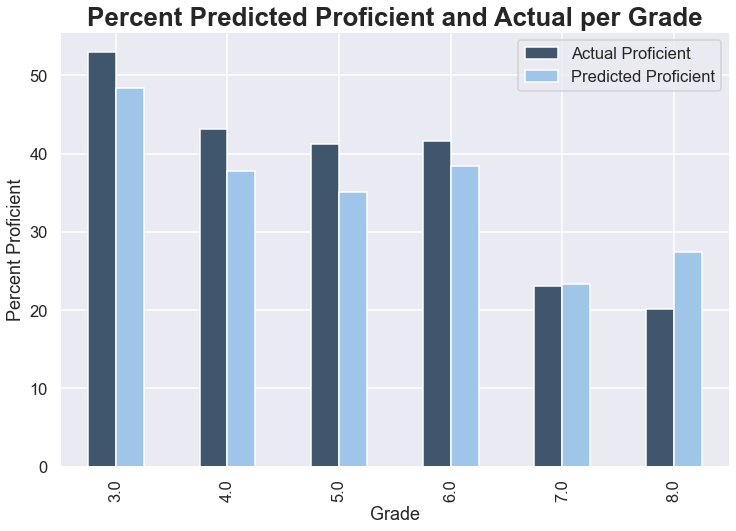

In [54]:
scores.plot(kind='bar', figsize=(12,8))
plt.title(
    'Percent Predicted Proficient and Actual per Grade', 
    fontsize='x-large',
    fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Percent Proficient');

## Prediction Match State Test Score

In [55]:
pred_acc = round(
    (state[state['Proficiency'] == state['predicted_proficiency']])
    .shape[0]/state.shape[0], 2)*100

84% of the predicted proficiency levels matched the actual levels determined by the state scores.

In [56]:
state['pred_match'] = (
    np.where(state['Proficiency'] == state['predicted_proficiency'], 1, 0)
)

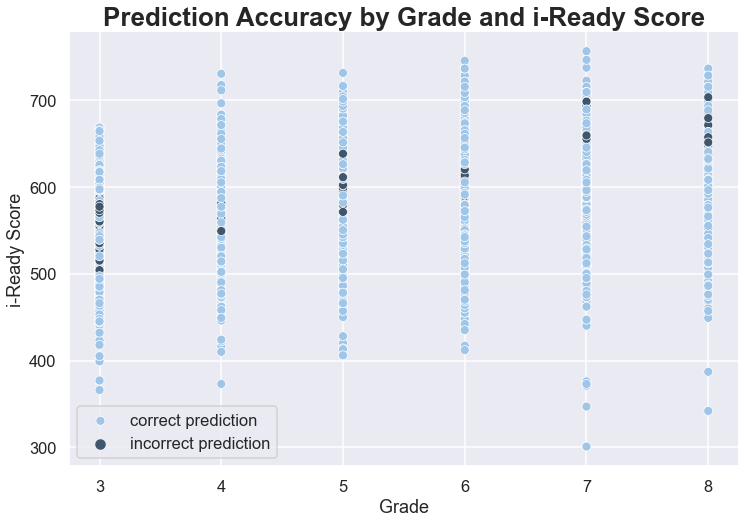

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    data=state, 
    x='Student_Grade', 
    y='iReady_Score', 
    hue='pred_match'
)
plt.legend(labels=['correct prediction', 'incorrect prediction'])
plt.title(
    'Prediction Accuracy by Grade and i-Ready Score',
    fontsize='x-large',
    fontweight='bold'
)
plt.xlabel('Grade')
plt.ylabel('i-Ready Score');

## Correlation Between i-Ready Score and State Test Score

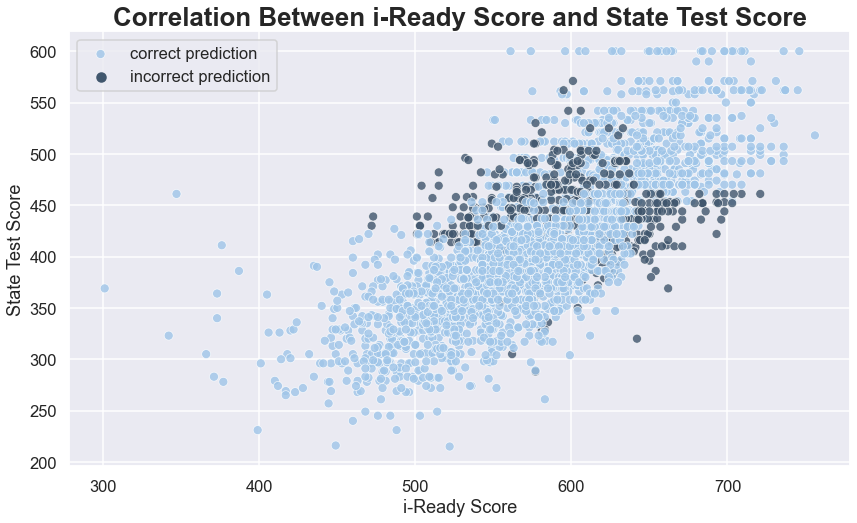

In [58]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=state, 
    x='iReady_Score', 
    y='Score', 
    hue='pred_match', 
    alpha=.8
)
plt.title(
    'Correlation Between i-Ready Score and State Test Score',
    fontweight='bold',
    fontsize='x-large'
)
plt.xlabel('i-Ready Score')
plt.ylabel('State Test Score')
plt.legend(labels=['correct prediction', 'incorrect prediction']);

In [74]:
#overall correlation between i-Ready score and test score
round(state[['Score', 'iReady_Score']].corr().loc['iReady_Score', 'Score'],2)

0.74

In [75]:
for grade in state['Student_Grade'].unique():
    df = state[state['Student_Grade'] == grade]
    corr = round(
        df[['Score', 'iReady_Score']].corr().loc['iReady_Score', 'Score'],2)
    print(f'The correlation between scores for grade {int(grade)} is {corr}')

The correlation between scores for grade 3 is 0.79
The correlation between scores for grade 4 is 0.83
The correlation between scores for grade 5 is 0.84
The correlation between scores for grade 6 is 0.82
The correlation between scores for grade 7 is 0.76
The correlation between scores for grade 8 is 0.76


## i-Ready Performance Summary

In [85]:
below = state[state['placement_grade'] < state['Student_Grade']].shape[0]
on = state[state['placement_grade'] == state['Student_Grade']].shape[0]
above = state[state['placement_grade'] > state['Student_Grade']].shape[0]

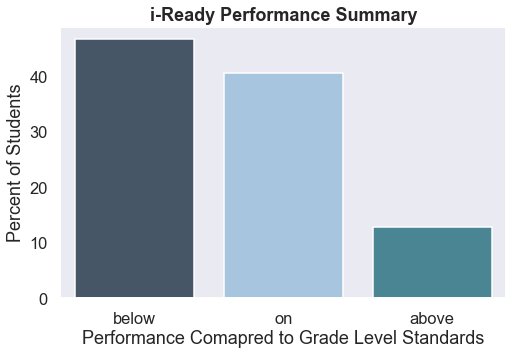

In [93]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x=['below', 'on', 'above'], y = [x/state.shape[0]*100 for x in [below, on, above]])
plt.title('i-Ready Performance Summary', fontweight='bold')
plt.ylabel('Percent of Students')
plt.xlabel('Performance Comapred to Grade Level Standards')
plt.grid(False);

In [94]:
state['grade_diff'] = state['placement_grade'] - state['Student_Grade']

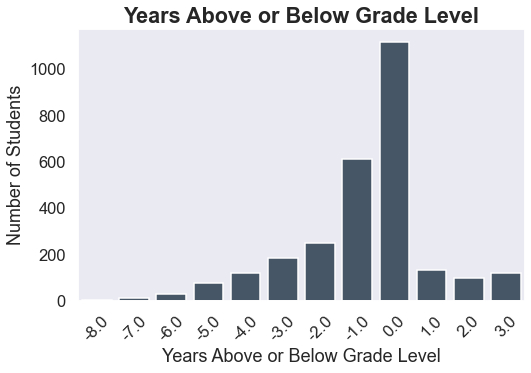

In [108]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=state, x = 'grade_diff', color=DARK_GRAY)
plt.xticks(rotation=45)
plt.xlabel('Years Above or Below Grade Level')
plt.ylabel('Number of Students')
plt.grid(False)
plt.title(
    'Years Above or Below Grade Level', 
    fontweight='bold', 
    fontsize='large'
);